Using TensorFlow backend.


NameError: name 'delay' is not defined

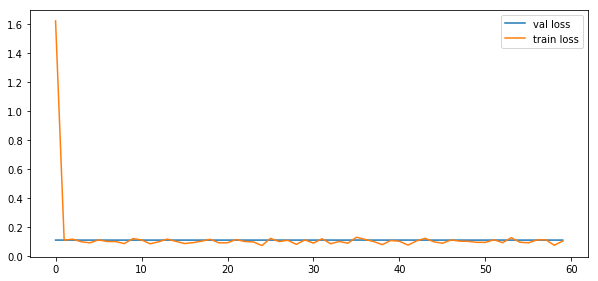

In [6]:
import pickle
import numpy as np
import copy 
from sklearn import decomposition
import os
import matplotlib.pyplot as plt
import yaml
from keras import models
from keras import layers
from keras import optimizers
import tensorflow as tf
from helpers import helper_functions

new_dir = "/global/cscratch1/sd/al34/autoruns/different_padding/ncomponents_None_lookback_4_prelayers_2_size_30_rnnsize_30_delay_6_numfinallayers_2_pad1dto_-100" 
# load_config(os.path.join(new_dir,'conf.yaml'))

fig = plt.figure(figsize = (10,10))
history = np.load(os.path.join(new_dir, 'history.npz'))
plot_position = 211

#print(plot_position)

tmp_fig = fig.add_subplot(plot_position)
tmp_fig.plot(history['val_loss'], label = "val loss")
tmp_fig.plot(history['loss'], label = 'train loss')
tmp_fig.legend()
# tmp_fig.set_ylim(0.1,0.35)
tmp_fig.set_title("MSE for Delay {} ms".format(delay*20))
if(np.max(history['loss'])>1):
    tmp_fig.set_ylim(0.1,0.35)
percent_change = (np.max(history['val_loss'])-np.min(history['val_loss']))/np.max(history['val_loss'])
tmp_fig.set_xlabel("Avg Percent Change for loss: {}".format(round(percent_change,2)))

plot_position = 212
#print(plot_position)
tmp_fig = fig.add_subplot(plot_position)
tmp_fig.plot(history['val_mean_absolute_error'], label = "val MAE")
tmp_fig.plot(history['mean_absolute_error'], label = 'train MAE')
tmp_fig.legend()
tmp_fig.set_title("MAE for Delay {} ms".format(delay*20))

percent_change = (np.max(history['val_mean_absolute_error'])-np.min(history['val_mean_absolute_error']))/np.max(history['val_mean_absolute_error'])
tmp_fig.set_xlabel("Avg Percent Change for MAE: {}".format(round(percent_change, 2)))